# <center><b><font color ='yellow'> Heart Failure Prediction Dataset </b> </font>

# <b><font color ='purple'> About our problem </b> </font> 
 
 <b><font color ='green'> Context </b> </font>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

 <b><font color ='green'> Attribute Information </b> </font>

Age: age of the patient [years]<br>

Sex: sex of the patient [M: Male, F: Female]<br>


ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>

RestingBP: resting blood pressure [mm Hg]<br>

Cholesterol: serum cholesterol [mm/dl]<br>

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>

Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>

HeartDisease: output class [1: heart disease, 0: Normal]<br>

## <b><font color ='purple'> Import Important Libraries and Open read My CSV File </b> </font>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn for data visualzation
import warnings
from sklearn import metrics #import scikit learn metrics module for accuracy calculation #evaluate the model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier #import Decision tree classifier
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
heart_disease=pd.read_csv("C:\\Users\\MARWA\\Desktop\\Study SEM 2\\7.Machine Learning\\project\\heart.csv")
print("rare file")
heart_disease # Shows the first 5 elements of the dataset

rare file


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,1,172,0,0.0,1,0
1,49,0,3,160,180,0,1,156,0,1.0,0,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,1,138,214,0,1,108,1,1.5,0,1
4,54,1,3,150,195,0,1,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,1,132,0,1.2,0,1
914,68,1,1,144,193,1,1,141,0,3.4,0,1
915,57,1,1,130,131,0,1,115,1,1.2,0,1
916,57,0,2,130,236,0,3,174,0,0.0,0,1


## <b><font color ='purple'> Exploratory data analysis (EDA)</b> </font>

In [3]:
heart_disease.index

RangeIndex(start=0, stop=918, step=1)

In [4]:
heart_disease["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

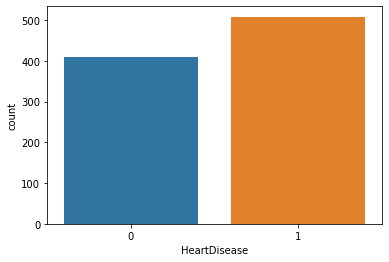

In [5]:
#Our Target Value Visualization
sns.countplot('HeartDisease', data= heart_disease)

In [6]:
#How many men and women (sex feature) are represented in this dataset?
heart_disease['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

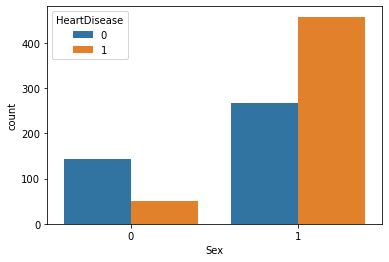

In [7]:
#"1" represents Male(orange) and "0" represents Female(blue)
#"1" also represents Existance of HeratDisease and "0" represents No Existance of Herat disease
sns.countplot('Sex',hue='HeartDisease', data= heart_disease)

Is the precence of the HeartDisease depends on Age?

In [2]:
plt.figure(figsize = (20,10))
sns.countplot('Age', hue='HeartDisease', data=heart_disease);
#HeartDisease frequency for Age

NameError: name 'plt' is not defined

"The answer is No as shown from the figure"

<hr>

## <b><font color ='purple'> Analysis using statistical methods File </b> </font>

<hr>

In [1]:
heart_disease.describe() # Previews a statistical overveiw for the data. 

NameError: name 'heart_disease' is not defined

In [10]:
heart_disease.loc[0:10,['Age']]

,Age
0,40
1,49
2,37
3,48
4,54
5,39
6,45
7,54
8,37
9,48


In [11]:
heart_disease.loc[:,['Age']].max()

Age    77
dtype: int64

In [12]:
heart_disease.loc[0:15,['Age']].value_counts()

Age
37     3
54     3
39     2
48     2
49     2
40     1
42     1
45     1
58     1
dtype: int64

In [13]:
#heart_disease.loc[:,:].value_counts()

In [14]:
heart_disease.info() # Previews a count for non-null values & the type of each column (feature) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [15]:
heart_disease.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
heart_disease.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [17]:
heart_disease.mean()

Age                53.510893
Sex                 0.789760
ChestPainType       1.781046
RestingBP         132.396514
Cholesterol       198.799564
FastingBS           0.233115
RestingECG          1.603486
MaxHR             136.809368
ExerciseAngina      0.404139
Oldpeak             0.887364
ST_Slope            0.567538
HeartDisease        0.553377
dtype: float64

In [18]:
heart_disease.median()

Age                54.0
Sex                 1.0
ChestPainType       1.0
RestingBP         130.0
Cholesterol       223.0
FastingBS           0.0
RestingECG          1.0
MaxHR             138.0
ExerciseAngina      0.0
Oldpeak             0.6
ST_Slope            0.0
HeartDisease        1.0
dtype: float64

In [19]:
heart_disease.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,1,1,120,0,0,1,150,0,0.0,0,1


In [20]:
sum(heart_disease.duplicated())


0

There is no duplicated Data

## <b><font color ='purple'> Data cleaning</b> </font>

<hr>

                                                    Finding if there is a missing values 

In [21]:
heart_disease.isnull().sum() # count for null values among the data.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

                                                    Visualizayion of the features of the data 

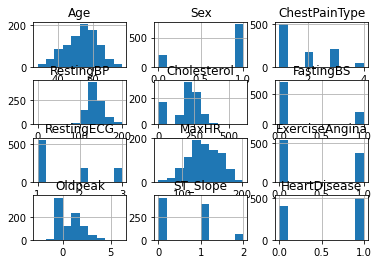

In [22]:
heart_disease.hist()
plt.show()

<hr>

## <b><font color ='purple'> Logistic Regression </b> </font>

<hr color="black">

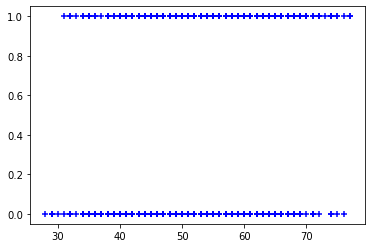

In [23]:
plt.scatter(heart_disease.Age,heart_disease.HeartDisease,marker='+',color='blue')

In [24]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(heart_disease[['Age']],heart_disease.HeartDisease,train_size=0.8) # 70% training and 30% test

In [25]:
X_test

,Age
246,54
780,64
71,44
727,60
510,60
...,...
308,58
17,43
504,62
301,55


In [26]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_predicted = model.predict(X_test)#Outcome result from the model

In [28]:
model.predict_proba(X_test)

array([[0.41906199, 0.58093801],
       [0.28035696, 0.71964304],
       [0.57185934, 0.42814066],
       [0.33264083, 0.66735917],
       [0.33264083, 0.66735917],
       [0.57185934, 0.42814066],
       [0.38939917, 0.61060083],
       [0.28035696, 0.71964304],
       [0.34645501, 0.65354499],
       [0.29295299, 0.70704701],
       [0.44932165, 0.55067835],
       [0.33264083, 0.66735917],
       [0.55671354, 0.44328646],
       [0.34645501, 0.65354499],
       [0.26809717, 0.73190283],
       [0.73666787, 0.26333213],
       [0.33264083, 0.66735917],
       [0.71208003, 0.28791997],
       [0.57185934, 0.42814066],
       [0.28035696, 0.71964304],
       [0.46460798, 0.53539202],
       [0.43413044, 0.56586956],
       [0.33264083, 0.66735917],
       [0.43413044, 0.56586956],
       [0.55671354, 0.44328646],
       [0.6450783 , 0.3549217 ],
       [0.25618263, 0.74381737],
       [0.46460798, 0.53539202],
       [0.17382492, 0.82617508],
       [0.41906199, 0.58093801],
       [0.

In [29]:
model.score(X_test,y_test)

0.5869565217391305

In [30]:
y_predicted

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

 model.coef_ indicates value of m in y=m*x + b equation

In [31]:
model.coef_#weight

array([[0.06160665]])

 model.intercept_ indicates value of b in y=m*x + b equation

In [32]:
model.intercept_#bias الخط بيتقاطع في نقطة معينة

array([-3.00013372])

<hr color="black">

## <b><font color ='purple'> Logistic Regression(Binary Class) </b> </font>

<hr color="black">

In [33]:
feature_cols=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
X =heart_disease [feature_cols] # Features
y =heart_disease.HeartDisease # Target variable
# split data to train set and test set 
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=1)#test=30% & train=70%

In [34]:
#bulid the LogisticRegression model
logreg= LogisticRegression()
logreg.fit(X_train,y_train)# fit the model with the data

LogisticRegression()

In [35]:
y_pred= logreg.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [36]:
#get confusion matrix
conf_matrix= metrics.confusion_matrix(y_test,y_pred)#metrics is a module from sklearn
conf_matrix

array([[ 81,   8],
       [ 21, 120]], dtype=int64)

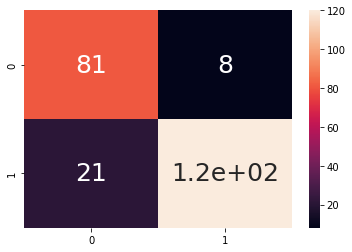

In [37]:
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 25}) # font size
plt.show()

In [38]:
print("Accuracy is = ", metrics.accuracy_score(y_test,y_pred)) #ACCURACY
print("precision is = ", metrics.precision_score(y_test,y_pred)) #PRECISION
print("recall is = ", metrics.recall_score(y_test,y_pred)) #RECALL

Accuracy is =  0.8739130434782608
precision is =  0.9375
recall is =  0.851063829787234


<hr>

## <b><font color ='purple'> Logistic Rogression (Multi Class) </b> </font>

<hr>

In [39]:
iris= load_iris()
# split data to train set and test set 
X_train,X_test,y_train,y_test= train_test_split(iris.data,iris.target, test_size=0.3, random_state=1)
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [40]:
logreg.score(X_test,y_test)

0.9777777777777777

In [41]:
logreg.score(X_train,y_train)

0.9809523809523809

In [42]:
y_pred= logreg.predict(X_test)

In [43]:
cm= metrics.confusion_matrix (y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

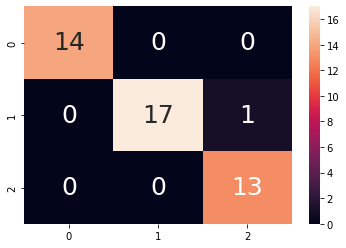

In [44]:
sns.heatmap(cm, annot=True, annot_kws={"size": 25}) # font size
plt.show()

In [45]:
print("Accuracy = ", metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.9777777777777777


In [46]:
print("Precsion = ", metrics.precision_score(y_test,y_pred, average= 'micro'))

Precsion =  0.9777777777777777


In [47]:
print("recall = ", metrics.recall_score(y_test,y_pred, average= 'micro'))

recall =  0.9777777777777777


<hr>

## <b><font color ='purple'> Decision Tree </b> </font>

<hr>

In [48]:
#split dataset in features and target variable
feature_cols = ["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak"]
X =heart_disease[feature_cols] # Features
y = heart_disease.HeartDisease# Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [49]:
#Performing The decision tree analysis using scikit learn 
# Create Decision Tree classifier object
#criterion= "gini" or "entropy", Max_depth could be any number
clf = DecisionTreeClassifier(max_depth=4, criterion= "entropy" ,random_state=0 )
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

In [50]:
print('DecisionTreeClassifierModel Train Score is : ' , clf.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , clf.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.839563862928349
DecisionTreeClassifierModel Test Score is :  0.7898550724637681


In [51]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
#But we should estimate how accurately the classifier predicts the outcome. The accuracy is computed by comparing actual test set values and predicted values.
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7898550724637681


In [53]:
print("precision_score = ",metrics.precision_score(y_test, y_pred))

precision_score =  0.8920863309352518


In [54]:
print("Recall_score= ",metrics.recall_score(y_test, y_pred))

Recall_score=  0.7425149700598802


In [55]:
print("F1-Score = ",metrics.f1_score(y_test, y_pred))

F1-Score =  0.8104575163398694


Feature: 0, Score: 0.02777
Feature: 1, Score: 0.02009
Feature: 2, Score: 0.41438
Feature: 3, Score: 0.01787
Feature: 4, Score: 0.11672
Feature: 5, Score: 0.06386
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04814
Feature: 8, Score: 0.20139
Feature: 9, Score: 0.08978


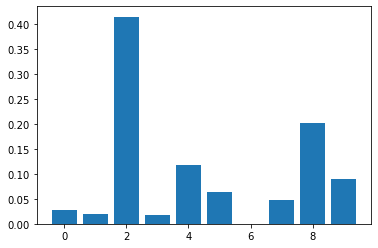

In [56]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [57]:
#!pip install graphviz
#!pip install pydotplus
#!pip install six
#!pip install --upgrade scikit-learn==0.20.3

In [58]:
import six
import sys
import os

In [59]:
sys.modules['sklearn.externals.six'] = six
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

## <b><font color ='purple'> Random Forest Classifier ( Ensmbele of DT) </b> </font>

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.822463768115942


In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.822463768115942


In [62]:
print("precision_score = ",metrics.precision_score(y_test, y_pred))

precision_score =  0.86875


In [63]:
print("Recall_score= ",metrics.recall_score(y_test, y_pred))

Recall_score=  0.8323353293413174


In [64]:
print("F1-Score = ",metrics.f1_score(y_test, y_pred))

F1-Score =  0.8501529051987767


In [65]:

print("Confusion Matrix ",metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix  [[ 88  21]
 [ 28 139]]


Feature: 0, Score: 0.08325
Feature: 1, Score: 0.04075
Feature: 2, Score: 0.19103
Feature: 3, Score: 0.07021
Feature: 4, Score: 0.14644
Feature: 5, Score: 0.02796
Feature: 6, Score: 0.01906
Feature: 7, Score: 0.11731
Feature: 8, Score: 0.14537
Feature: 9, Score: 0.15863


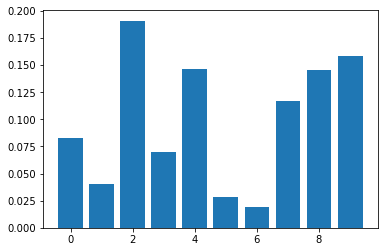

In [66]:
import matplotlib.pyplot as plt
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


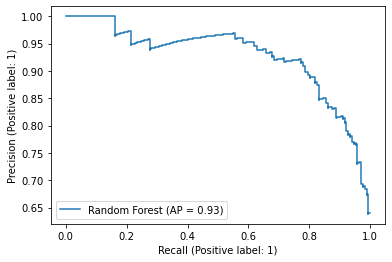

In [67]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(clf, X_test, y_test, name = 'Random Forest')

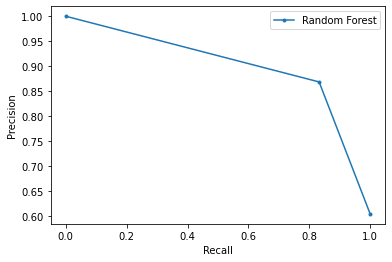

In [68]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

<hr>

## <b><font color ='purple'>Suport Vector Machine (SVM) </b> </font>

In [69]:

#splitting data into 80:20 train test ratio
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=1)#test=20% & train=80%
#training SVM model with linear kernel
model = SVC(kernel='linear', random_state = 10) 
model.fit(X_train, y_train)
#predicting output for test data
pred = model.predict(X_test)

In [70]:
#building confusion matrix
conf_matrix2= metrics.confusion_matrix(y_test,pred) #metrics is a module from sklearn
conf_matrix2

array([[62, 12],
       [16, 94]], dtype=int64)

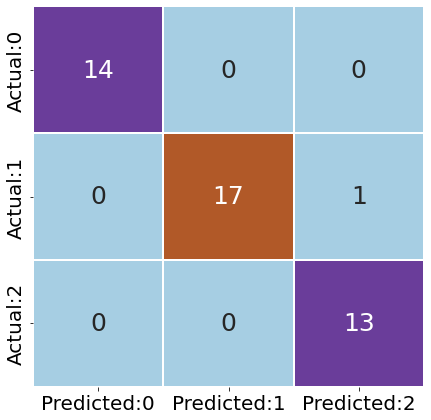

In [71]:
plt.rcParams['figure.figsize'] = [7,7]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2'], index = ['Actual:0','Actual:1', 'Actual:2'])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [72]:
# get model's accuracy
print("Model_Accuracy = ", metrics.accuracy_score(y_test,pred))

Model_Accuracy =  0.8478260869565217


<hr>